# Geographical Data Science Assignment 3
### Measuing the Deprivation levels of Merseyside through various data sets and stratergies
#### By Eamon Magdoubi 

<br/> <br/>
## Introduction
Deprivation is the Ministry of Housing, Communities and Local Governments statistic to find funding for areas within England and Wales (Penny, 2019). This rating calculates a person living condition with regards to lack of resources for a multitude of key factors. This coursework will work alongside various forms of data sets including Lower-layer Super Output Area (LSOA), Points and Data frames to select five LSOA’S for funding and the reason for it.

In [3]:
#STANDARD GEOGRAPHIC MODULES
#Importing numpy allowing for mathematicl operations
import numpy as np
#Pandas importing which allow to edit Dataframe data sets in csv and xlsx
import pandas as pd
#Geopandas allows for GeoDataframe and polygon rendering for SHP objects
import geopandas as gpd
# pysal Python Spatial Analysis Library allows for chropleth mapping
import pysal as ps
#Seaborn is used to use techniques such as 
import seaborn as sns
# matplot allows for graphs to be created for morans I and XY graphs
import matplotlib.pyplot as plt
#DBSCAN method for noise and main points for point method
from sklearn.cluster import dbscan
# reducing the datasets from a large amount to a usable amount
from functools import reduce
# allowing interactive and fixed elements on a HTML envrionment for Python
from ipywidgets import interact, fixed

#Choropleth and LISA CREATION
#allowing for matplotinline creation without object creation
%matplotlib inline
#moran plotting weighted attributes for each variable for standarization
from pysal.lib import weights
# morans ESDA for plotting and achieveing Moran values
from pysal.explore import esda
# for LISA and spatial autocorrelation plotting of points in a LSOA
from pysal.viz.splot.esda import moran_scatterplot, lisa_cluster,plot_local_autocorrelation
#used for background maps for graph creation
import contextily as ctx

#K MEAN SECTION
# from sklearn.cluster import KMeans 
from sklearn.cluster import KMeans 
# Principal component analysis (PCA) which reduces SVD's to a . single dimension for graphs
from sklearn.decomposition import PCA
#allowing to plot a set amount of colours passed in for aesthetical graph
from matplotlib import colors as mcolors 
#allowing for mathemtical components with basic Python
import math 

#3D GRAPH CREATION
#colour map import from matplot graph tool
from matplotlib import cm 
# MATPLOT3D Axes which allows for ZYX graphs
from mpl_toolkits.mplot3d import Axes3D 

#random seed creates a random number prediction for 123
np.random.seed(123)

#detection of lISA in a graph
from pysal.viz.splot.esda import plot_local_autocorrelation

In [4]:
#CSV AND SHP files for IMD (Index of Multiple Deprivation) calculation



#Data from Council tax brackets used for with housing  price range
# Link to data-set: https://data.cdrc.ac.uk/dataset/cdrc-2015-council-tax-bands-geodata-pack-liverpool-e08000012
councilTax_path = '../councilTaxBands/shapefiles/E08000012.shp'

# merseyside police dataset that uses points for crime ratio
# Link to data-set: https://data.police.uk/data/
mo_path = '../MerseysidePoliceRecords/2019-09-merseyside-outcomes.csv'

#health deprivation measuring health rating throughout the country
# Link to data-set: https://opendatacommunities.org/slice?dataset=http%3A%2F%2Fopendatacommunities.org%2Fdata%2Fsocietal-wellbeing%2Fimd2019%2Findices&http%3A%2F%2Fopendatacommunities.org%2Fdef%2Fontology%2Fcommunities%2Fsocietal_wellbeing%2Fimd%2Findices=http%3A%2F%2Fopendatacommunities.org%2Fdef%2Fconcept%2Fgeneral-concepts%2Fimd%2Fhealthdeprivdisability&http%3A%2F%2Fpurl.org%2Flinked-data%2Fcube%23measureType=http%3A%2F%2Fopendatacommunities.org%2Fdef%2Fontology%2Fcommunities%2Fsocietal_wellbeing%2Fimd%2FscoreObs
healthdep_path ='societal-wellbeing_imd2019_indices.csv'

#population growth per LSOA through the uk and allows for possitive and negative values
#Link to data-set: https://www.ons.gov.uk/economy/environmentalaccounts/datasets/ratiooflandconsumptiongrowthratetopopulationgrowthratebycountryandlowerlayersuperoutputarea
persongrowthratio_path = 'landtopopulationgrowth.xlsx'

#employed/unemployed people per LSOA in England
# Link to data-set http://infuse2011.ukdataservice.ac.uk/InFuseWiz.aspx?cookie=openaccess
employmentRate_path = 'Data_AGE_ECOACT_UNIT.csv'

#education rating per LSOA in England
# Link to data-set https://opendatacommunities.org/slice?dataset=http%3A%2F%2Fopendatacommunities.org%2Fdata%2Fsocietal-wellbeing%2Fimd2019%2Findices&http%3A%2F%2Fopendatacommunities.org%2Fdef%2Fontology%2Fcommunities%2Fsocietal_wellbeing%2Fimd%2Findices=http%3A%2F%2Fopendatacommunities.org%2Fdef%2Fconcept%2Fgeneral-concepts%2Fimd%2Feducskilltraindepriv&http%3A%2F%2Fpurl.org%2Flinked-data%2Fcube%23measureType=http%3A%2F%2Fopendatacommunities.org%2Fdef%2Fontology%2Fcommunities%2Fsocietal_wellbeing%2Fimd%2FscoreObs
educationRate_path  = 'educationscoreLSOA.csv'

# income path rating for LSOA Liverpool
# Link to data-set https://data.cdrc.ac.uk/dataset/cdrc-2016-individual-income-estimates-lep-geodata-pack-lcr-e37000022
income_path = './E37000022/spatial/E37000022.shp'

#Entire sets are used as they are all percentages into the total Deprivation rate that the 
# Ministry of Housing, Communities and Local Government use.

In [5]:
#Council tax bracket dataset which uses the tax brackets for liverpool as 
#defined with: https://liverpool.gov.uk/media/1357456/council-tax-guide_ver_10_070319.pdf
# setting the index so joins and merges can be done on other datasets
councilTBracket = gpd.read_file(councilTax_path).set_index('LSOA11CD', drop=False)
# Band is A Up to £40,000 which is the ratio we will use from that 
#compared to all houses that are in a band
councilTBracket['Bands_Ratio'] = councilTBracket.apply(lambda row: (row['BAND_A'])/row['All_Bands'], axis=1)

# A subgroup of measurement is the financial accessibility of a household which will be measured using the 
# house tax rate bands for the Liverpool City Council. As funding is the main goal a ratio between all bands and 
# Band A was chosen as it had a reduction in charge and used other bands funding for disability and health 
# funding with these households (Liverpool City Council, 2019). 


In [6]:
#Health data set stops any error lines since the data set had empty NaN values
healthdep = pd.read_csv(healthdep_path, error_bad_lines=False)
#finding the ratio for health deprivation which is a point in total IMD Deprivation.
healthdep['LSOA11CD'] = healthdep['LSOA11CD'].map(lambda x: x.lstrip('http://opendatacommunities.org/id/geography/administration/lsoa/'))
#Setting the index for the healthdeprivation to allow a join later on
healthdep =healthdep.set_index('LSOA11CD')
#GET the largest value of health so a ratio can be made from 0 to 1 so every variable 
# is in the same max values
maxHealth = healthdep[' Healthrating'].max()
#Ratio of current health rating with the maximum achieved in England
healthdep[' Healthrating'] =  healthdep[' Healthrating'] /maxHealth

Multiple sources provided an IMD (Index of Multiple Deprivation) score for Merseyside but a research-based approach was created to use the formula constructed by the Ministry of Housing from multiple sources found online such as the Infuse 2011, the Ministry of Housing and the Merseyside Police.

In [ ]:
#Population growth reading into a pd file as it is not a SHP file and does not contain a geometry
pgrowthr = pd.read_excel(persongrowthratio_path)
#Values initially had spaces between certain values so this function could not join with other sets
pgrowthr['LSOA11CD'] =   pgrowthr['LSOA11CD'].str.strip()
#Setting index for future joins and not allowing for duplicate collumns
pgrowthr = pgrowthr.set_index('LSOA11CD')

In [8]:
#Reading CSV file for employee values from the 2011 England Census classic data collection
employeer = pd.read_csv(employmentRate_path)
#Find the ratio of unemployed users with total checked with survey for ratio
employeer['unEmployment_Ratio'] = employeer.apply(lambda row: (row['Einactive'])/(row['Einactive']+row['EActive']), axis=1)
#Set index for future joins to find total deprivation
employeer =employeer.set_index('LSOA11CD')

In [9]:
#Getting the crime points for the merseyside area. Values are points so geomotry is viable
merseyCrime =  gpd.read_file(mo_path)
#Changing the collumn name so a join can be done
names = merseyCrime.columns.tolist()
#Altering index with incorrect data 
names[names.index('LSOA code')] = 'LSOA11CD'
#Changing collumns with array of new value
merseyCrime.columns = names
#setting index so mersey crime can be used in datasets
merseyCrime = merseyCrime.set_index('LSOA11CD')

In [10]:
#Converting string Longnitude values to floats so they can be plotted and 
# needs to be in seperate cell
merseyCrime['Longitude'] =         merseyCrime['Longitude'].astype('float')

In [11]:
#Converting string Latitude values to floats so they can be plotted and needs to be in seperate cell
merseyCrime['Latitude'] =         merseyCrime['Latitude'].astype('float')

In [12]:
#Creating a geodataframe with the points achieved from the float values set in above cells
merseyGPD = gpd.GeoDataFrame(
merseyCrime, geometry=gpd.points_from_xy(merseyCrime.Longitude, merseyCrime.Latitude))

In [13]:
#Read the education rate data set achieved from the ODC to a CSV file
eduRate = pd.read_csv(educationRate_path, error_bad_lines=False)
#LSOA collumn had copyrighted information so it was removed on each row to match other sets
eduRate['LSOA11CD'] = eduRate['LSOA11CD'].map(lambda x: x.lstrip('http://opendatacommunities.org/id/geography/administration/lsoa/'))
#Setting the index later on after the row was mapped properly so the index can perform a join
eduRate =eduRate.set_index('LSOA11CD')
# Finding the ratio of the education score compared to other sets within the graph
eduRate['EducationScore'] = eduRate.apply(lambda row: (row['EducationScore']/eduRate['EducationScore'].max()), axis=1)

In [14]:
#Reading income data set for Liverpool that uses the different income brackers for a user
#Using Rank 1 = £0.00  and Rank 2 = £0.01 to £5,000.00 which is £10,000 less than the minimum wage
incomeRate = gpd.read_file(income_path)
#Getting Array list of all collumn name String
names = incomeRate.columns.tolist()
#remaining collumn name for inner join capabilities latter
names[names.index('lsoa11cd')] = 'LSOA11CD'
#enforcing new collumn names
incomeRate.columns = names
#setting index for on join on
incomeRate = incomeRate.set_index('LSOA11CD')
#Create ratio for Users earning less than £10,000 and 0 as the data isalready given in a ratio
incomeRate['lowestIncomebracket'] = incomeRate.apply(lambda row: ((row['rank_1']+row['rank_2'] )), axis=1)
#Remove geo location as Counciltax has geometry and a pandas clash exception will occour
incomeRate = incomeRate.drop(columns=['geometry'])

In [15]:
# Create array of  Dataframs for simple concat function, more time efficient than merge
dfsArray = [councilTBracket, healthdep, pgrowthr, employeer, eduRate, incomeRate] #incomeRate

In [16]:
#Filling all empty row values with nan_value
nan_value = 0
# Create PD called DeprivationDataset  concatting all the data with an inner join
DeprivationDataset = pd.concat(dfsArray, join='inner', axis=1).fillna(nan_value)

In [17]:
#Creating a geodataframe with the points achieved from the float values set in above cells

# Create counts for mersey crime to have for each LSOA area
crime_lsoa = merseyGPD.groupby('LSOA11CD').size()
#use the count list for a new row
DeprivationDataset['crime_ratio'] = crime_lsoa
# Assign counts into a column in the LSOAS table
missing = DeprivationDataset.loc[DeprivationDataset['crime_ratio'].isnull(), :]
#fill all NA values with 0 count
DeprivationDataset = DeprivationDataset.fillna(0)

In [18]:
#finding out the crime ratio compares to the highest value in the merseyside area
DeprivationDataset['crime_ratio'] = DeprivationDataset['crime_ratio']/ DeprivationDataset['crime_ratio'].max()

In [19]:
#Drop all irrelevent sections such as . specified values for Bands as ratio had been established
DepSpecified = DeprivationDataset.drop(['BAND_A', 'BAND_B', 'BAND_C', 'BAND_D',  'BAND_E',  'BAND_F',  'BAND_G',  'BAND_H',  'BAND_I'], axis=1)
#Drop goverment 2011 . statistic variables
DepSpecified  = DepSpecified.drop(['Reference area','CDU_ID','GEO_LABEL', 'GEO_TYPE','EActive', 'Einactive' ,'GEO_TYP2'], axis=1)
# Remove bands tax bracket information from table so functions can run faster 
#with less collumns
DepSpecified  = DepSpecified.drop(['LSOA name', 'All_Bands', 'rank_1','rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6', 'rank_7', 'rank_8', 'rank_9', 'no_info', ' Reference area'], axis=1)
#creating a geometry object that can be created on a graph
DepGeometry = DepSpecified
#removing geomotry information so k-means on all clusters can bedone
DepSpecified = DepSpecified.drop(['geometry', 'LSOA11CD'], axis=1) 

Research into geodemographic analysis was done to asses multiple methods to identify key area codes for funding. Previous studies on the orthodox/mainstream divide were done using the k-mean approach, which is often used to find highly local maxima and minima solutions (Sapiro, 2015). This is key for the algorithm method as locating adjacent clusters for a local maximum on a graph after forming the deprivation rating was important to quantify target regions. An aggregation was then formed on all the crime point data sets to allow for centroid clustering with k-means on each LSOA.

In [20]:
#Creating 7 different clusters for each data set
clusters = 7
#construst a kmeans object init with 7 areas
kmeans = KMeans(n_clusters = clusters) 
#Create kmeans matrix on the dep specified without the geomotry area
kmeans.fit(DepSpecified) 
#print to demonstrate knowledge of k means values 
print(kmeans.labels_)

[4 4 4 0 0 2 4 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 0 0 0 0 4 4
 4 0 2 4 0 4 0 0 0 0 4 2 4 0 4 4 6 0 0 0 4 4 2 2 2 2 2 2 2 2 2 0 4 2 4 2 2
 2 2 2 2 2 2 2 6 0 0 0 0 0 0 0 4 0 0 0 0 4 0 0 4 1 4 2 2 2 2 2 4 2 2 4 2 2
 0 0 0 0 0 4 2 4 0 0 0 0 0 0 0 2 4 3 4 4 4 4 0 0 5 0 0 0 0 2 2 5 3 2 6 5 0
 0 0 4 0 0 0 0 2 2 2 2 2 2 2 2 2 2 0 0 4 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0
 4 4 4 5 2 4 4 0 0 0 0 5 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 0 4 0 0 0
 0 0 0 0 0 0 4 0 0 0 0 0 4 0 0 4 0 0 0 4 2 2 6 0 0 0 4 2 4 4 4 4 4 0 4 0 0
 2 2 2 3 2 4 2 4 2 2 4 0 4 0 0 4 4 0 6 4 2 4 2 2 2 2 2 4 4 0 4 2 4 0 0 0 2
 0 4]


In [21]:
# Principal component analysis (PCA) creates 3 set observations into linearly uncorrelated 
# variables called principal components
pca = PCA(3) 
#Fit the PCA 3 sections into the deprivationspeicified table
pca.fit(DepSpecified) 
# Create a PCA analysis using the transform function to create the correlation between each k means
# The k means values will be compared anduses a 3 layered PCA for a 3-D representation

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
#Create colours from the base set of m . colours from thier order in HSV values
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict( 
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS 
                                                      ).items())))[1] 
   
#Find the number of steps to create n* clusters of colours  for skipped amount on the graph 
skips = math.floor(len(colors[5 : -5])/clusters) 
# create the clusters colours by using the 5 . different colours arrays while includding the 
#skipped variables in the array set 
cluster_colors = colors[5 : -5 : skips]

The K-Means clusters can be plotted using a PCA (Principal Component Analysis) heatmap which identifies clusters based on socioeconomic characteristics (Aungkulanon et al., 2017). This heatmap showed strong links between commonly deprived values for areas in Merseyside. This figure identifies the components that need funding with heavily correlated clusters linked across multiple variables (Aungkulanon et al., 2017). Funding from the graph shows the strongest positively correlating sets are Education, Health and Housing quality with unemployment being a secondary focus. This linked heavily with a lot of research as it was found that with deprivation, a parallel relationship was made between health and deprivation levels (Stewart, Livingston, Walsh and Mitchell, 2018).

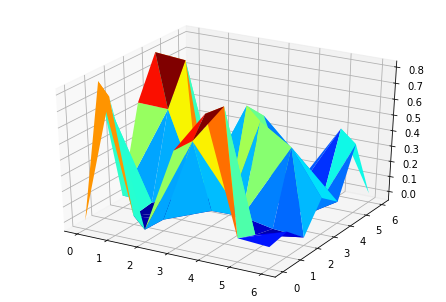

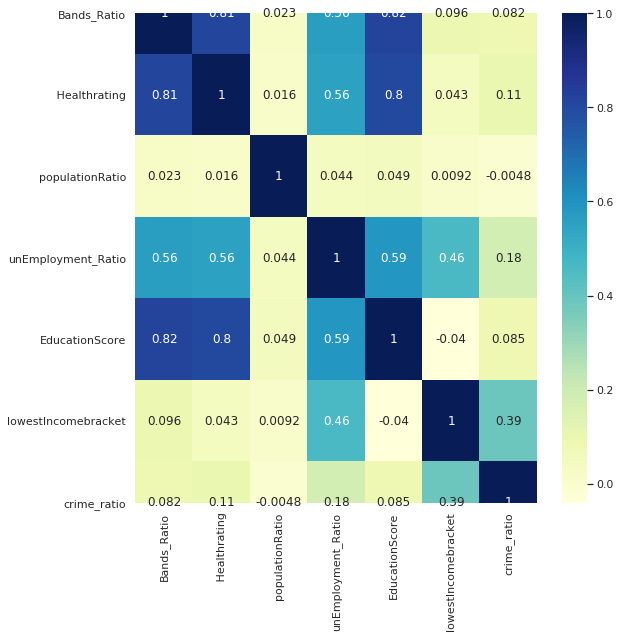

In [23]:

# generating correlation data from k-means multi dimensions
df = DepSpecified.corr() 
#Colate the range of values for the array up to the array length of the array to create index values fro each child element
df.index = range(0, len(df)) 
#Rename the column inplace with to the zipped df column and index values 
df.rename(columns = dict(zip(df.columns, df.index)), inplace = True) 
# Create df to be an object so object properties can be used
df = df.astype(object) 
  

# Specified values for each coordinates are made with the range of values being saved
for i in range(0, len(df)): 
    #interative for loop to go through each coorodiante and each correlation value then plot it on 3D space
    for j in range(0, len(df)): 
        #checking if x and y axis are equal
        if i != j: 
            #setting coordinat values for non matching x and y values
            df.iloc[i, j] = (i, j, df.iloc[i, j]) 
        #else statement for i !=j
        else : 
            #setting z value to be 0
            df.iloc[i, j] = (i, j, 0) 
            
#creat empty array for flatten values to go into
df_list = [] 
  
# flattening dataframe values for each loop
for sub_list in df.values: 
    #shrinking values by extend function
    df_list.extend(sub_list) 
#
#  Alternate the list of tuples into trivariate dataframe which can be transfomed into a AXES-3D graph 
plot_df = pd.DataFrame(df_list) 
#Setting up 3d graph init for AXES-3D
fig = plt.figure() 
#creat graph with ax function and 3D axis
ax = Axes3D(fig) 
  
# plotting 3D trisurface plot with the K-Means correlation data analysis points
ax.plot_trisurf(plot_df[0], plot_df[1], plot_df[2],  
                    cmap = cm.jet, linewidth = 0.2) 
#showing 3D trisurface plotted grah  
plt.show() 


  
# generating correlation heatmap for the K-Means display to show the 
# correraltion between each values k-means cluster and each other 
sns.set(font_scale=1)
plt.subplots(figsize=(9,9))
#Heat map creation with the correlated values and using the YlGnBu Colour set. Values are shown
# as a trisurface plot heat map
sns.heatmap(DepSpecified.corr(), annot = True, cmap="YlGnBu") 
  
# posting correlation heatmap to output console  
plt.show()
#the heatmap is clipped at the top and bottom due to the version of SNS when 
#researching online from a github form thread.
# for thread: https://github.com/mwaskom/seaborn/issues/1773

As the Ministry of Housing Communities identified Liverpool and Knowsley as local authorities within the top 10 highest proportion of deprivation the method used by the government will be taken into consideration for this analysis (Penny, 2019).
All the data used will be proportional data with a ratio between 0 and 1 for every variable as to keep a uniform standard and allow for percentages to matter with the formula. The calculation for English Index of Multiple Deprivation from the Ministry of Housing Communities is:



__** IMD =  (EdcuS * 13.5% + BandsR * 9.3% + unEmp * 22.5 % + lowInc * 22.5 % + HealthR * 13.5 % + popR * 9.3% + crimeR * 9.3 %) **__

In [ ]:

#Using the english government information for the ratio analysis to create a deprivation rating after
# K-Means tuplets ratio comarison has been made a general skewe has . been shown to correlate values.
# AS RATIOS ARE BETWEEN 0-1 the *0.135 is the percentage to take into consideration and as teh values
#have . the same bound the percentages will make an impact.
DepGeometry['DeprivationRate'] = DepGeometry.apply(lambda row: (row['EducationScore']*0.135
                                                                + row['Bands_Ratio']*0.093
                                                                + row['unEmployment_Ratio']*0.225
                                                                + row['lowestIncomebracket']*0.225
                                                                + row[' Healthrating']*0.135
                                                                + row['populationRatio']*0.093
                                                                + row['crime_ratio'] *0.093)
                                                                , axis=1)

In [25]:
#Create Queen and rook spatial auto correlation on DepGeometry with the index variables.
# Method ofconnecting data sets together through the Queen and rook approach from a spatial matrix on 'DeprivationRate' 
%time w = weights.Queen.from_dataframe(DepGeometry, idVariable='LSOA11CD')

CPU times: user 1.44 s, sys: 200 ms, total: 1.64 s
Wall time: 1.65 s


In [26]:
#Time frame only took 2.69 seconds since dropped the unused values
# standardize the matrix for each row
w.transform = 'R'

In [27]:
#Create spatial lag with the deprivationrate values with the higher 
# the value meaning the higher the deprivation rating
# W is standardized with the average values of the varaible and its neighbourhoods
DepGeometry['w_DeprivationRate'] = weights.lag_spatial(w, DepGeometry['DeprivationRate'])

In [28]:
#Find row standardized with each row being the ratevalue - the mean value for the section
DepGeometry['DeprivationRate_std'] = (DepGeometry['DeprivationRate'] - DepGeometry['DeprivationRate'].mean()) /DepGeometry['DeprivationRate'].std()

In [29]:
# Able to view spatial lags z value or spatial pattern through producing a spatial lag on the standardised values
DepGeometry['w_DeprivationRate_std'] = weights.lag_spatial(w, DepGeometry['DeprivationRate_std'])

In [30]:
#Create a Local Indication of Spatial Autocolleration with the deprivation rate 
lisa = esda.Moran_Local(DepGeometry['DeprivationRate'], w)

In [31]:
# Break observations into significant or not
DepGeometry['significant'] = lisa.p_sim < 0.05
# Store the quadrant they belong to
DepGeometry['quadrant'] = lisa.q

Using a spatial lag will assist in smoothing out any biased parts of a data set and break down any administrative boundaries imposed to better understand the underlying DGP (Data Generating Process) providing an improved predictive assessment (Arribas-Bel, Patino and Duque, 2017). Selection of area codes is critical using a spatial autocorrelation technique such as a global Moran’s I to establish local and global spatial clusters. These cluster differences between subsidiary neighbourhoods indicate the degree of spatial concentration of a graph (Dearden, Lloyd. And Catney 2018).  A method for prediction of a linear model for funding and still maintaining the data interoperability is to transform the data through spatial autocorrelation (Arribas-Bel, Patino and Duque, 2017). The output will identify the suitable LISA (Local Indication of Spatial Autocorrelation) areas that can be further diagnosed for specific LSOA areas to be chosen.

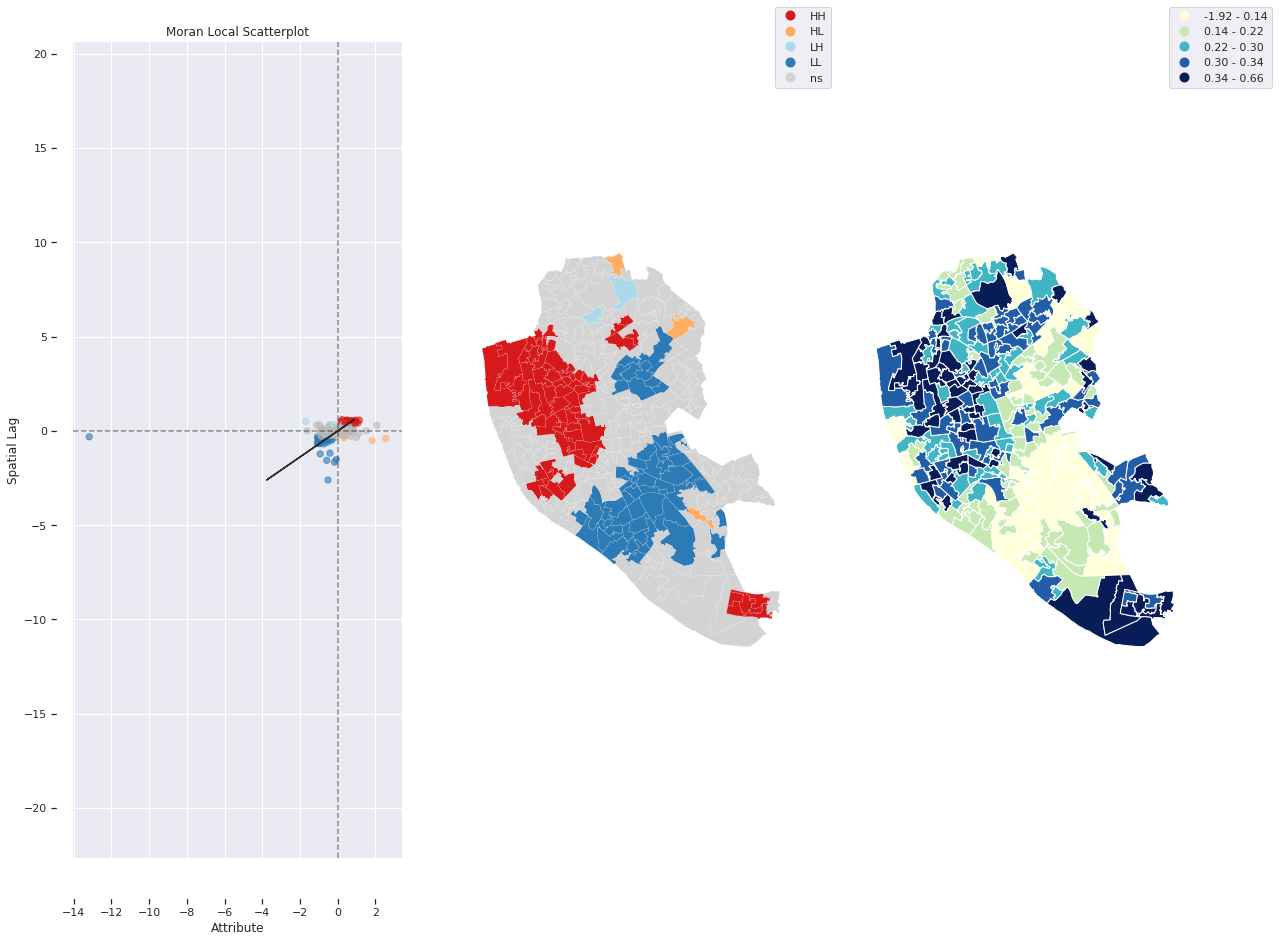

In [32]:
#Create a spatial autocorrelation 3 part 3
#1: LISA Morans I graph for correlation display
#2: LISA analysis for outliered variables and clustered points
#3: Chroropleth heatmap of produced values
plot_local_autocorrelation(lisa, DepGeometry,'DeprivationRate',figsize=(20,15))
#Showing plotted graphs for LISA analysis in 3 forms
plt.show()

In [33]:
# Setup the figure and axis 
# Create variables for all components to get all forms of LISA analysis
#NS = Non specified for all values that have no string spatial lag correlation between surrounding nodes
ns = DepGeometry.loc[DepGeometry['significant']==False, 'geometry']
#  HH clusters values for quadrent values and the values are significant 
hh = DepGeometry.loc[(DepGeometry['quadrant']==1) & (DepGeometry['significant']==True), 'geometry']
#  LL clusters values in the quadrent 3 which is the Low Low values
ll = DepGeometry.loc[(DepGeometry['quadrant']==3) & (DepGeometry['significant']==True), 'geometry']
#  LH clusters for low values surrodunded by high values
lh = DepGeometry.loc[(DepGeometry['quadrant']==2) & (DepGeometry['significant']==True), 'geometry']
#  HL clusters that are High values then have a surrounding by a low value
hl = DepGeometry.loc[(DepGeometry['quadrant']==4) & (DepGeometry['significant']==True), 'geometry']
#Values that will be used in the next step is Hl and HH since the higher the skewed values the higher the 
#deprivation rate

Every data set so far has been transformed into a polygon but does introduce barrier altercations. The inherit restrictions of a polygon in a clear demarcation manner make a choropleth graph (as shown in figure 2) affect with boundary issues in a MAUP (Modifiable Area Unit Problem) (Stewart, Livingston, Walsh and Mitchell, 2018). This is why to measure an area’s density, coordinate values from tweets around Merseyside are used as a point set.
This allows for a DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to find clusters of points amongst arbitrary shapes used from the highly populated clustered deprived areas from the LISA and Moran’s analysis (Zhu et al., 2018).


In [34]:
#Create section fort Liverpool Twitter Data set recieved from the Microsoft Teams group
tw_path = '../tweets_liverpool/tweets_liverpool.shp'
# READ tw to have the index for the LSOA column
tw = gpd.read_file(tw_path).set_index('LSOA11CD')

In [35]:
#SECTION OR UNIONINISING LISA analysis to geodataframe
#using the hh (High High) Dataframe file it was changed into a GeoDataframe with geomotry values
hhgdfb = gpd.GeoDataFrame(gpd.GeoSeries(hh))
#using the hl (High Low) Dataframe file it was changed into a GeoDataframe with geomotry values
hhgdfa = gpd.GeoDataFrame(gpd.GeoSeries(hl))
#Drop gemotry value for hhgdfa since hhgdfb has value and a calsh will be done with append
hhgdfa = hhgdfa.drop(columns=['geometry'])
#add the values for both into a new geodataframe
hhgdf = hhgdfb.append(hhgdfa)

# Set the "seed" so every run produces the generates the same random numbers
# Seed for np will be set to a random variable so every pass through will provide a random set of values
# in a hueristic fashion
np.random.seed(1234)
# Create a sequence of length equal to the number of rows in the table that were selected
ri = np.arange(len(tw))
# Randomly shuffle the values to a different oder
np.random.shuffle(ri)
# Reindex the table by using only the first 10,000 numbers
# of the (now randomly arranged) sequence
tw = tw.iloc[ri[:10000], :]

In [36]:
# Drop the geomotry value for tw as the hhgdf table geomotries already set
tw = tw.drop(columns=['geometry'])
#Join the two tables together on the INDEX balue to create mergetwitter
mergeTwitter = hhgdf.join(tw, on='LSOA11CD')

In [37]:
#Reset index as DBSCAN cannot work with INDEX values
mergeTwitter = mergeTwitter.reset_index(drop=False)

In [38]:
# Round the shape file using numpy for the shape value 0
minp = np.round(mergeTwitter.shape[0] * 0.01)

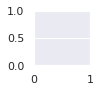

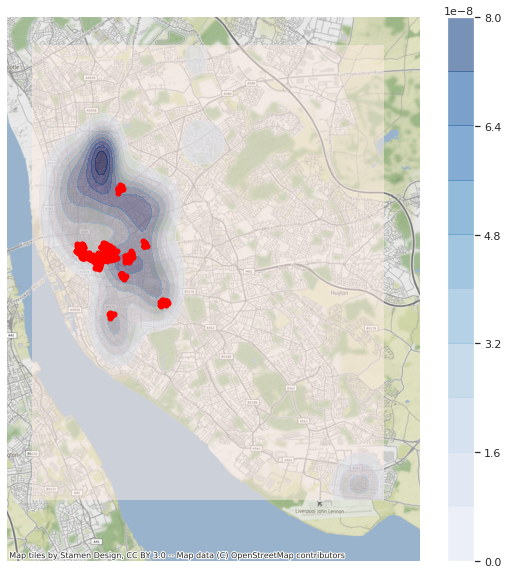

In [39]:
# RUNNING DB SCAN AND KDE on non noise values to show continus spread


# Create CS and LBLS which are the scikit-learn cusltering method for the x and y axises used
cs, lbls = dbscan(mergeTwitter[['X', 'Y']], eps=100, min_samples=minp)
# Turn labels into a Series
# lbls with the mergeTwitter index used  reset from above output to not produce error
lbls = pd.Series(lbls, index=mergeTwitter.index)
# Setup figure and axis for graph must be set up so the backgroudn can be made for next graph
f, ax = plt.subplots(1, figsize=(1, 1))
# Subset points that are not part of any cluster (noise)
df = councilTBracket
# Set up the initial plot values so the points can be plotted
ax = df.plot(figsize=(10, 10), alpha=0.4, edgecolor='k')
# Introduce the base map around the preset sabed councilTBracket which the geomtry values are based of so google maps
# API and introduce the map coordinates
ctx.add_basemap(ax, crs=councilTBracket.crs)
# Setting the off axis for the graph
ax.set_axis_off()

# Find the noise values for the merge twitter DBSCAN
noise = mergeTwitter.loc[lbls==-1, ['X', 'Y']]


# Display the figure

# Preposed method to allow for semi-translucent KDE analysis on NOISE NODES to illustrate spread to remove background in
# image so underlying graph can show
ax = sns.kdeplot(noise['X'], noise['Y'], cmap='Reds', cut=0, shade=True, alpha=0.5)
# Setting alpha value to 0 but another layer must be made to remove tint
ax.collections[0].set_alpha(0)
# i is used on the length of values for the collection to be used later
i = len(ax.collections)
# Noise values are done the same on the blue hue instead of red. This is since they can cancel the
# background layer with with RGB cross hatching
sns.kdeplot(noise['X'], noise['Y'], cmap='Blues', cut=0, shade=True, ax=ax, alpha=0.5 ,cbar=True)
# Using the values from the i alpha hue to provide the closest prerensation of a transparanet KDE plot
ax.collections[i].set_alpha(0)


# Plot the scatter values from the DBSCAN on the Geographical data frame that collected high, high and
# High low values to see the spread of the noise crossing the points.
ax.scatter(mergeTwitter.loc[mergeTwitter.index.difference(noise.index), 'X'], \
mergeTwitter.loc[mergeTwitter.index.difference(noise.index), 'Y'], \
c='red', linewidth=0)

In [46]:
# Get geodataframe for the Clustered DBSCAN points only into new geo dataframe
result_final = mergeTwitter.loc[mergeTwitter.index.difference(noise.index)].drop_duplicates(subset=['LSOA11CD'], keep='first')

In [47]:
#  Setting index of result_final
result_final =result_final.set_index('LSOA11CD', drop=True)

In [48]:
# Drop geomitry column
result_final = result_final.drop(columns=['geometry'])

In [49]:
# Join the results LSOA values with
finalValue =result_final.join(DepGeometry, on='LSOA11CD')
# Sorting the final value by the Y coordinate since when examining the noise value a lot of points were
# closer to the north and the higher the values the more the cluster even in the middle cluster area
finalValue=finalValue.sort_values(by=['DeprivationRate', 'Y'], ascending=False)

In [50]:
# Drop extra columns for display for user
finalValue = finalValue.drop(columns=['LAT','LON','YEAR','MONTH','DAY','DOW','HOUR','MINUTE','quadrant'])

In [51]:
# Show final selected LSOA areas that are use the k-mean cluster values that correllate, have a high,
# LISA analysis and are cluster points in a DBSCAN compared to the KDE spread of the nosie values
finalValue.head(5)

,X,Y,LSOA11CD,geometry,Bands_Ratio,Healthrating,populationRatio,unEmployment_Ratio,EducationScore,lowestIncomebracket,crime_ratio,DeprivationRate,w_DeprivationRate,DeprivationRate_std,w_DeprivationRate_std,significant
LSOA11CD,,,,,,,,,,,,,,,,
E01033747,336178.670567,392930.429429,E01033747,"POLYGON ((335878.527 392629.257, 335878 392629...",0.763889,0.685650,0.304658,0.347943,0.708475,0.131,0.000000,0.395344,0.377480,0.938852,0.830115,True
E01006542,336256.389604,393038.610923,E01006542,"POLYGON ((336125.335 393119.642, 336111.572 39...",0.916667,0.462363,0.771070,0.274079,0.447288,0.136,0.070000,0.378540,0.341531,0.836567,0.611289,True
E01006556,337603.822771,389148.195646,E01006556,"POLYGON ((337303.346 388972.66, 337301.604 388...",0.961165,0.508881,0.000368,0.308924,0.634877,0.196,0.063333,0.363328,0.316784,0.743968,0.460650,True
E01006746,336624.957010,390900.958447,E01006746,"POLYGON ((336400.277 390935.759, 336399.391 39...",1.000000,0.512546,-0.000342,0.341144,0.424391,0.213,0.063333,0.350027,0.347961,0.663006,0.650429,True
E01006646,335835.047769,391046.529210,E01006646,"POLYGON ((335533.607 391324.683, 335529.545 39...",0.761468,0.633493,0.117729,0.294145,0.547312,0.140,0.093333,0.347537,0.348573,0.647845,0.654155,True


## Conclusion
Overall, a general depiction of Merseyside showed large sections of deprivation specifically in the north of Liverpool and south of Speak from the LISA analysis. After careful investigation it was found out that through a DBSCAN a set of cluster and noise values were found.
<br> Furthermore, a KDE (Kernel Density Estimation) was done on the noise values from a DBSCAN to illustrate the spread of non-clustering values without any prior knowledge (Zhu et al., 2018). This showed that the noise spread was a further north so the depraved areas for the northern clusters must be weighted when it came to selection. The clustered set was ordered in this way, so the clustered points were ordered based of deprivation score and then y coordinate resulting in:
- **E01033747**
- **E01006542**
- **E01006556**
- **E01006746**
- **E01006646**
<br> <br> Being the chosen LSOA areas to fund for Education, Health and Housing from the k-means and PCA (Principal Component Analysis) heatmap analysis from Figure 1. 


# Reference List:
    

D. Arribas-Bel., J.E. Patino. and J.C. Duque. Remote sensing-based measurement of Living Environment Deprivation: Improving classical approaches with machine learning. Plos One, 12(5): p. 1-25, 2 May 2017. 

A. Aungkulanon., et al. Area-level socioeconomic deprivation and mortality differentials in Thailand: results from principal component analysis and cluster analysis. International Journal for Equity in Health, 16(117), p.1- 12, 2017. 

E.K. Dearden., C.D. Lloyd and G. Catney. A spatial analysis of health status in Britain, 1991–2011. Science Direct: Social Science & Medicine, 220: p.340-352, January 2019. 

Liverpool City Council. Your guide to council tax 2019/20. Liverpool Gov UK, 7 March 2019.   https://liverpool.gov.uk/media/1357456/council-tax-guide_ver_10_070319.pdf (accessed 21 November 2019). 

B. Penney. The English Indices of Deprivation 2019 (IoD2019)- Statistical Release. National Statistics: Ministry of Housing Communities & Local Government, 26 September 2019. https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/835115/IoD2019_Statistical_Release.pdf (accessed 26 November 2019). 

P. Sapiro. Beyond the strictly orthodox/mainstream divide: Applying geodemographic analysis to a small nationwide sub-population. Science Direct: Computers, Environment and Urban Systems, 56: p.36-47, March 2016. 

J.L. Stewart., M. Livingston., D. Walsh. and R. Mitchell. Using population surfaces and spatial metrics to track the development of deprivation landscapes in Glasgow, Liverpool, and Manchester between 1971 and 2011. Computers, Environment and Urban Systems, 72, p.124-133, July 2018. 

L. Zhu., et al. Improvement of DBSCAN Algorithm Based on Adaptive Eps Parameter Estimation, 27, December 2018. 